In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import datetime
import torch
import os
import importlib
import sys
import re
import pickle
from IPython.display import clear_output
from mpl_toolkits import mplot3d
from io import BytesIO
from math import log, exp, tan, atan, ceil
from PIL import Image

#from utils import dataset_utils
from utils import dataset_utils
from utils import createAISdata
#from utils import protobufDecoder
from utils import plotting
from models import VRNN
from Config import config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f">> Using device: {device}")
#timestamp = datetime.datetime.fromtimestamp(update.t_epoch_sec).strftime('%d/%m/%Y %H:%M:%S')

>> Using device: cuda:0


In [2]:
shiptypes = config.SHIPTYPE_CARGO + config.SHIPTYPE_TANKER
shipFileName = 'CargTank_1911'
binedges = (config.LAT_EDGES, config.LON_EDGES, config.SOG_EDGES, config.COG_EDGES)
batch_size = 4

In [13]:
with open(r"C:\Users\carlo\workspace\special_course\data\report\trainingCurves_CargTank_1911_latent75.pkl", 'rb') as file:
    epochs = pickle.load(file)
    num = len(epochs['loss_tot'])
    print('Number of epochs completed: {}'.format(num))
    for i in range(num):
        print('\nEpoch {}:'.format(i+1))
        for key in epochs.keys():
            print('{}: {}'.format(key, epochs[key][i]))

Number of epochs completed: 6

Epoch 1:
loss_tot: 9535.599821471184
kl_tot: 17.59904885311293
recon_tot: -9518.000763028109
val_loss_tot: 60.85346445391255
val_kl_tot: 16.96787350562311
val_recon_tot: -43.88559103688886

Epoch 2:
loss_tot: 50.96140955708887
kl_tot: 10.460156449662092
recon_tot: -40.501253028313066
val_loss_tot: 48.47314770606256
val_kl_tot: 8.20678239391696
val_recon_tot: -40.266365258001514

Epoch 3:
loss_tot: 42.87377146800308
kl_tot: 5.10925198986578
recon_tot: -37.764519503687644
val_loss_tot: 42.153425534156064
val_kl_tot: 3.79073970671623
val_recon_tot: -38.36268560594128

Epoch 4:
loss_tot: 36.67381069166111
kl_tot: 1.5396152714747164
recon_tot: -35.13419552107947
val_loss_tot: 35.96420180289976
val_kl_tot: 0.8867799511263448
val_recon_tot: -35.07742190453314

Epoch 5:
loss_tot: 33.46626851110785
kl_tot: 0.630951903226531
recon_tot: -32.83531659091189
val_loss_tot: 34.87864758891444
val_kl_tot: 0.8758925597898422
val_recon_tot: -34.00275501866494

Epoch 6:
loss_

In [4]:
def training_plots(loss_tot, kl_tot, recon_tot, val_loss_tot, val_kl_tot, val_recon_tot):
        
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    
    ax[0].plot(loss_tot, label='Training Loss')
    ax[0].plot(val_loss_tot, label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()
    
    ax[1].plot(kl_tot, label='Training KL-divergence')
    ax[1].plot(val_kl_tot, label='Validation KL-divergence')
    ax[1].set_title('KL divergence')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()
    
    ax[2].plot(recon_tot, label='Training Reconstruction')
    ax[2].plot(val_recon_tot, label='Validation Reconstruction')
    ax[2].set_title('Reconstruction probability log_prob(x)')
    ax[2].set_xlabel('Epoch')
    ax[2].legend()

## Baseline (latent size = 100)

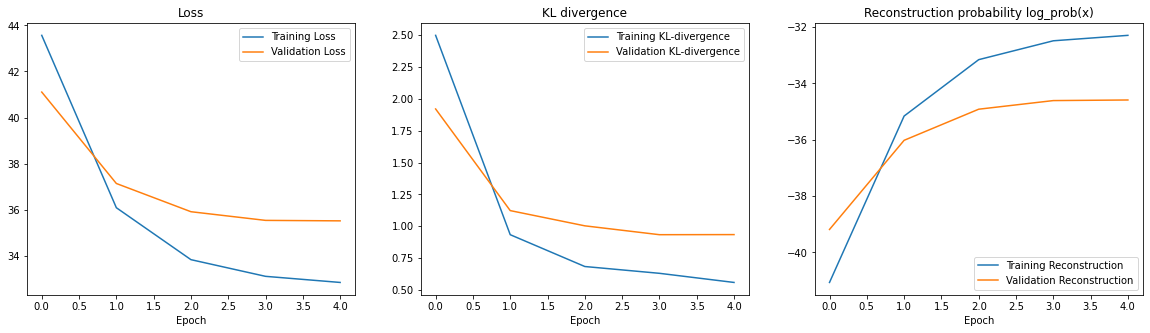

In [8]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 200

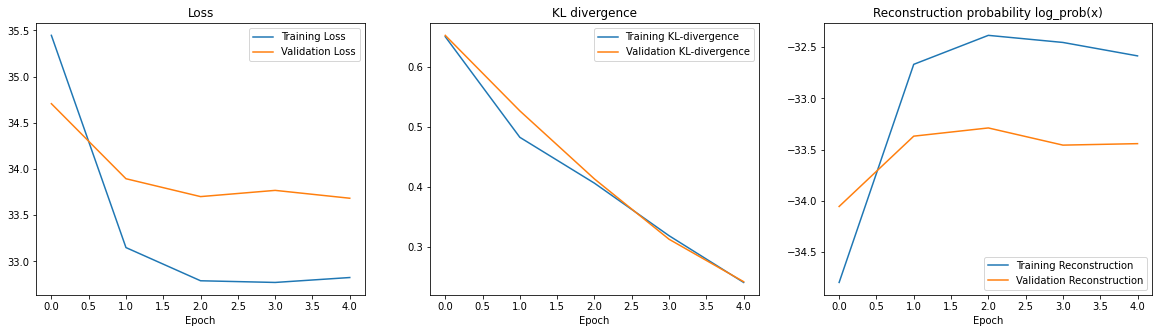

In [10]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 50

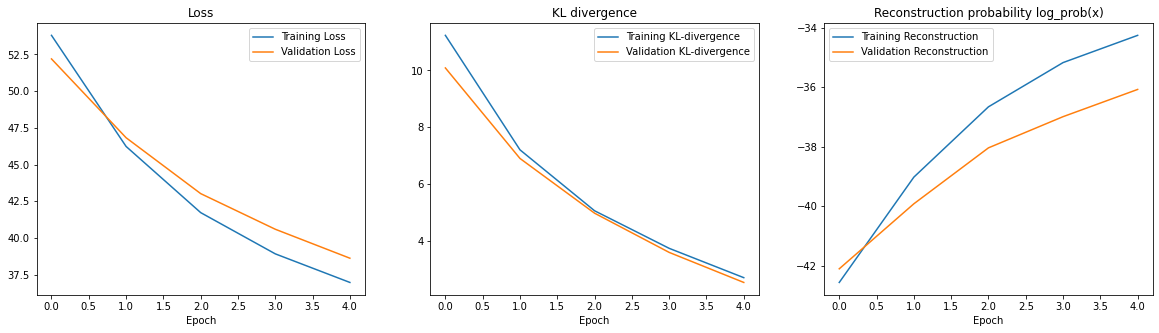

In [12]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 75

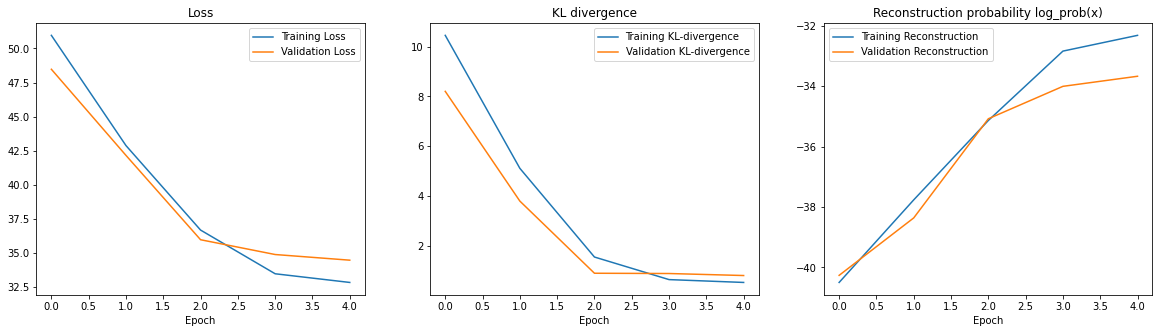

In [14]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

In [ ]:


plotting.plot_recon(trainset[1], binedges,model,device)